<a href="https://colab.research.google.com/github/gulabpatel/R/blob/main/Linear_Regression_colab_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using native R on Google Colab**

In this Jupyter notebook, I will be showing you how to use native R right inside Google Colab.

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

## Installing libraries

In [1]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [2]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing libraries

In [3]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [4]:
library(ggplot2)

In [5]:
library(mlbench)

## How many CPU cores are there?

In [6]:
library(parallel)
detectCores(all.tests = FALSE, logical = TRUE)

[1] 2

---

# Machine Learning in R: Building a Linear Regression Model


### Importing libraries

In [10]:
library(mlbench) # Contains several benchmark data sets (especially the Boston Housing dataset)
library(caret) # Package for machine learning algorithms / CARET stands for Classification And REgression Training

### Importing the Boston Housing data set

In [11]:
data(BostonHousing)

head(BostonHousing)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio b      lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

### Check to see if there are missing data?

In [12]:
sum(is.na(BostonHousing))

[1] 0

### To achieve reproducible model; set the random seed number

In [13]:
set.seed(100)

### Performs stratified random split of the data set

In [14]:
TrainingIndex <- createDataPartition(BostonHousing$medv, p=0.8, list = FALSE)
TrainingSet <- BostonHousing[TrainingIndex,] # Training Set
TestingSet <- BostonHousing[-TrainingIndex,] # Test Set

### Build Training model

In [15]:
Model <- train(medv ~ ., data = TrainingSet,
               method = "lm",
               na.action = na.omit,
               preProcess=c("scale","center"),
               trControl= trainControl(method="none")
)

### Apply model for prediction

In [16]:
Model.training <-predict(Model, TrainingSet) # Apply model to make prediction on Training set
Model.testing <-predict(Model, TestingSet) # Apply model to make prediction on Testing set


### Model performance (Displays scatter plot and performance metrics)
Scatter plot of Training set

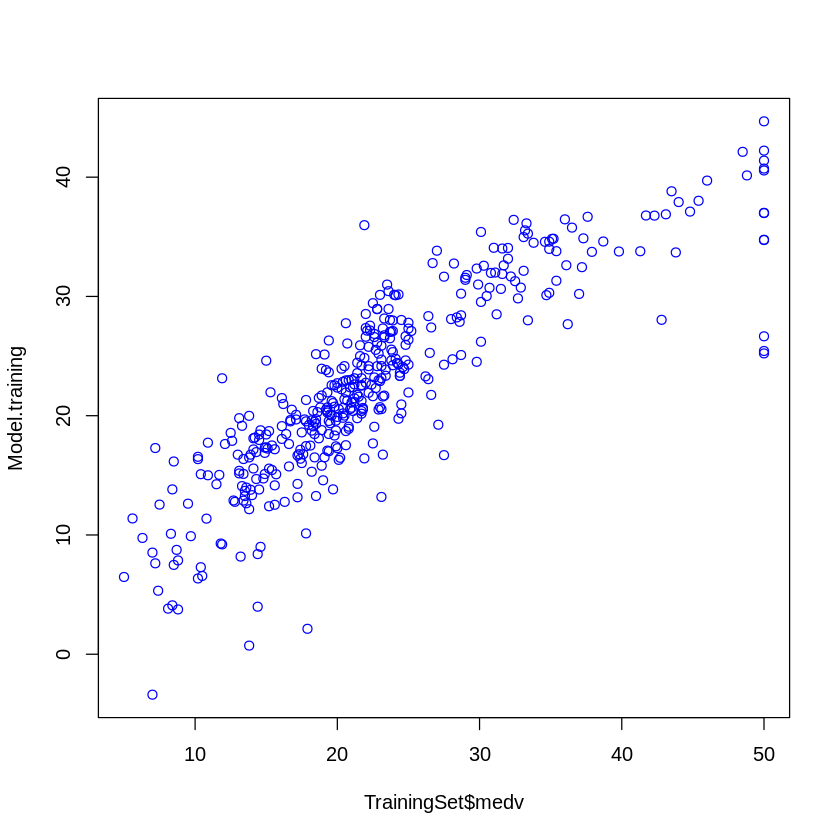

In [17]:
plot(TrainingSet$medv,Model.training, col = "blue" )

Scatter plot of Testing set

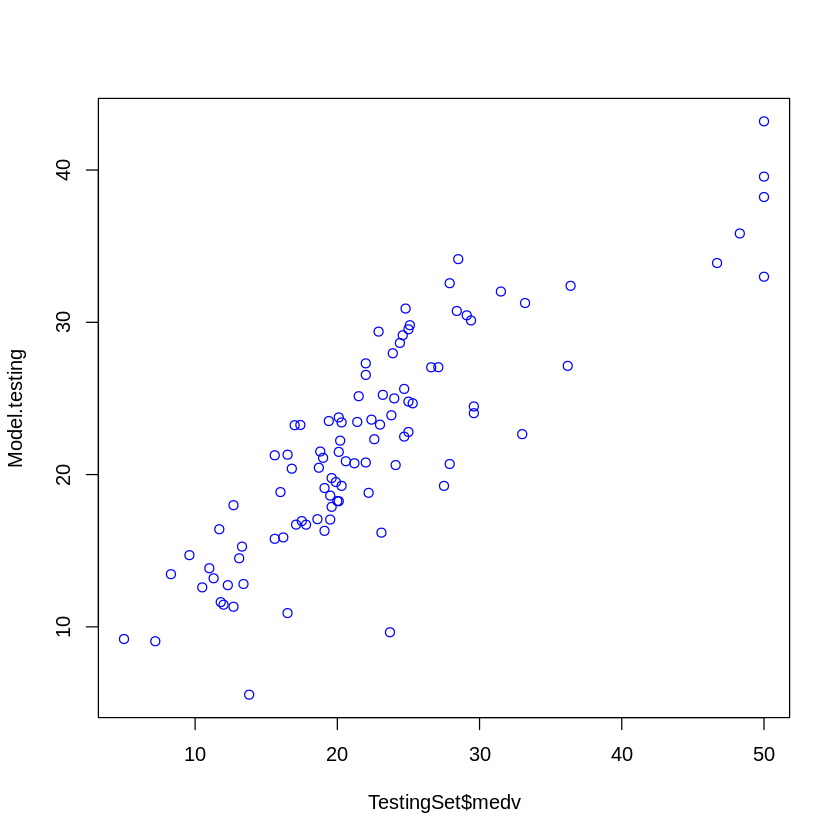

In [18]:
plot(TestingSet$medv,Model.testing, col = "blue" )